# Superstore Membership Purchase - Data Cleaning & Preparation  
**Author:** Giovanna Cardenas  
**Description:** This notebook cleans and transforms customer data from a retail superstore to prepare it for modeling. It includes handling missing values, reducing redundancy in categorical variables, and exploring feature distributions to support predictive analysis.

In [438]:
# Import packages
%matplotlib inline
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [440]:
# Load data
df= pd.read_csv('superstore_data.csv')
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


In [442]:
# Delete rows with null values
data= df.dropna(axis= 0)
data.shape

(2216, 22)

In [444]:
# Check for unique values in Marital Status and drop unusual entries
print(data['Marital_Status'].unique())

['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']


In [446]:
data = data[~data['Marital_Status'].isin(['YOLO', 'Alone','Absurd','Together'])]
print(data['Marital_Status'].unique())

['Divorced' 'Single' 'Married' 'Widow']


In [448]:
# Check for unique values in Education and drop unusual entries
print(data['Education'].unique())

['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']


In [450]:
# Combine '2n cycle' and 'master' to reduce redundancy
data['Education'] = data['Education'].replace({'2n Cycle': 'Postgrad', 'Master': 'Postgrad'})
print(data['Education'].unique())

['Graduation' 'PhD' 'Postgrad' 'Basic']


In [452]:
# transform categorical data
data = pd.get_dummies(data, columns=['Marital_Status', 'Education'], drop_first=False)

In [454]:
# Remove date type variable
data.drop(columns='Dt_Customer', inplace=True)

In [456]:
data.head()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Response,Complain,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow,Education_Basic,Education_Graduation,Education_PhD,Education_Postgrad
0,1826,1970,84835.0,0,0,0,189,104,379,111,...,1,0,True,False,False,False,False,True,False,False
1,1,1961,57091.0,0,0,0,464,5,64,7,...,1,0,False,False,True,False,False,True,False,False
2,10476,1958,67267.0,0,1,0,134,11,59,15,...,0,0,False,True,False,False,False,True,False,False
4,5371,1989,21474.0,1,0,0,6,16,24,11,...,1,0,False,False,True,False,False,True,False,False
5,7348,1958,71691.0,0,0,0,336,130,411,240,...,1,0,False,False,True,False,False,False,True,False


In [458]:
# Show statistics summary
data.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000
mean,5578.946822,1969.176039,51893.188264,0.438875,0.496944,48.756112,304.070293,26.654034,167.411369,37.029340,27.369804,44.070905,2.316626,4.074572,2.668093,5.819071,5.333130,0.165037,0.009780
std,3254.579083,11.989223,21471.284078,0.536661,0.544635,29.082606,338.433243,40.132245,226.457735,53.732823,41.587896,51.928166,1.919478,2.748467,2.932552,3.264717,2.415222,0.371327,0.098439
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2800.750000,1960.000000,35502.500000,0.000000,0.000000,24.000000,23.000000,2.000000,15.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5454.500000,1970.000000,51400.500000,0.000000,0.000000,49.000000,173.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8407.250000,1978.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,34.000000,230.500000,49.250000,35.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,160803.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


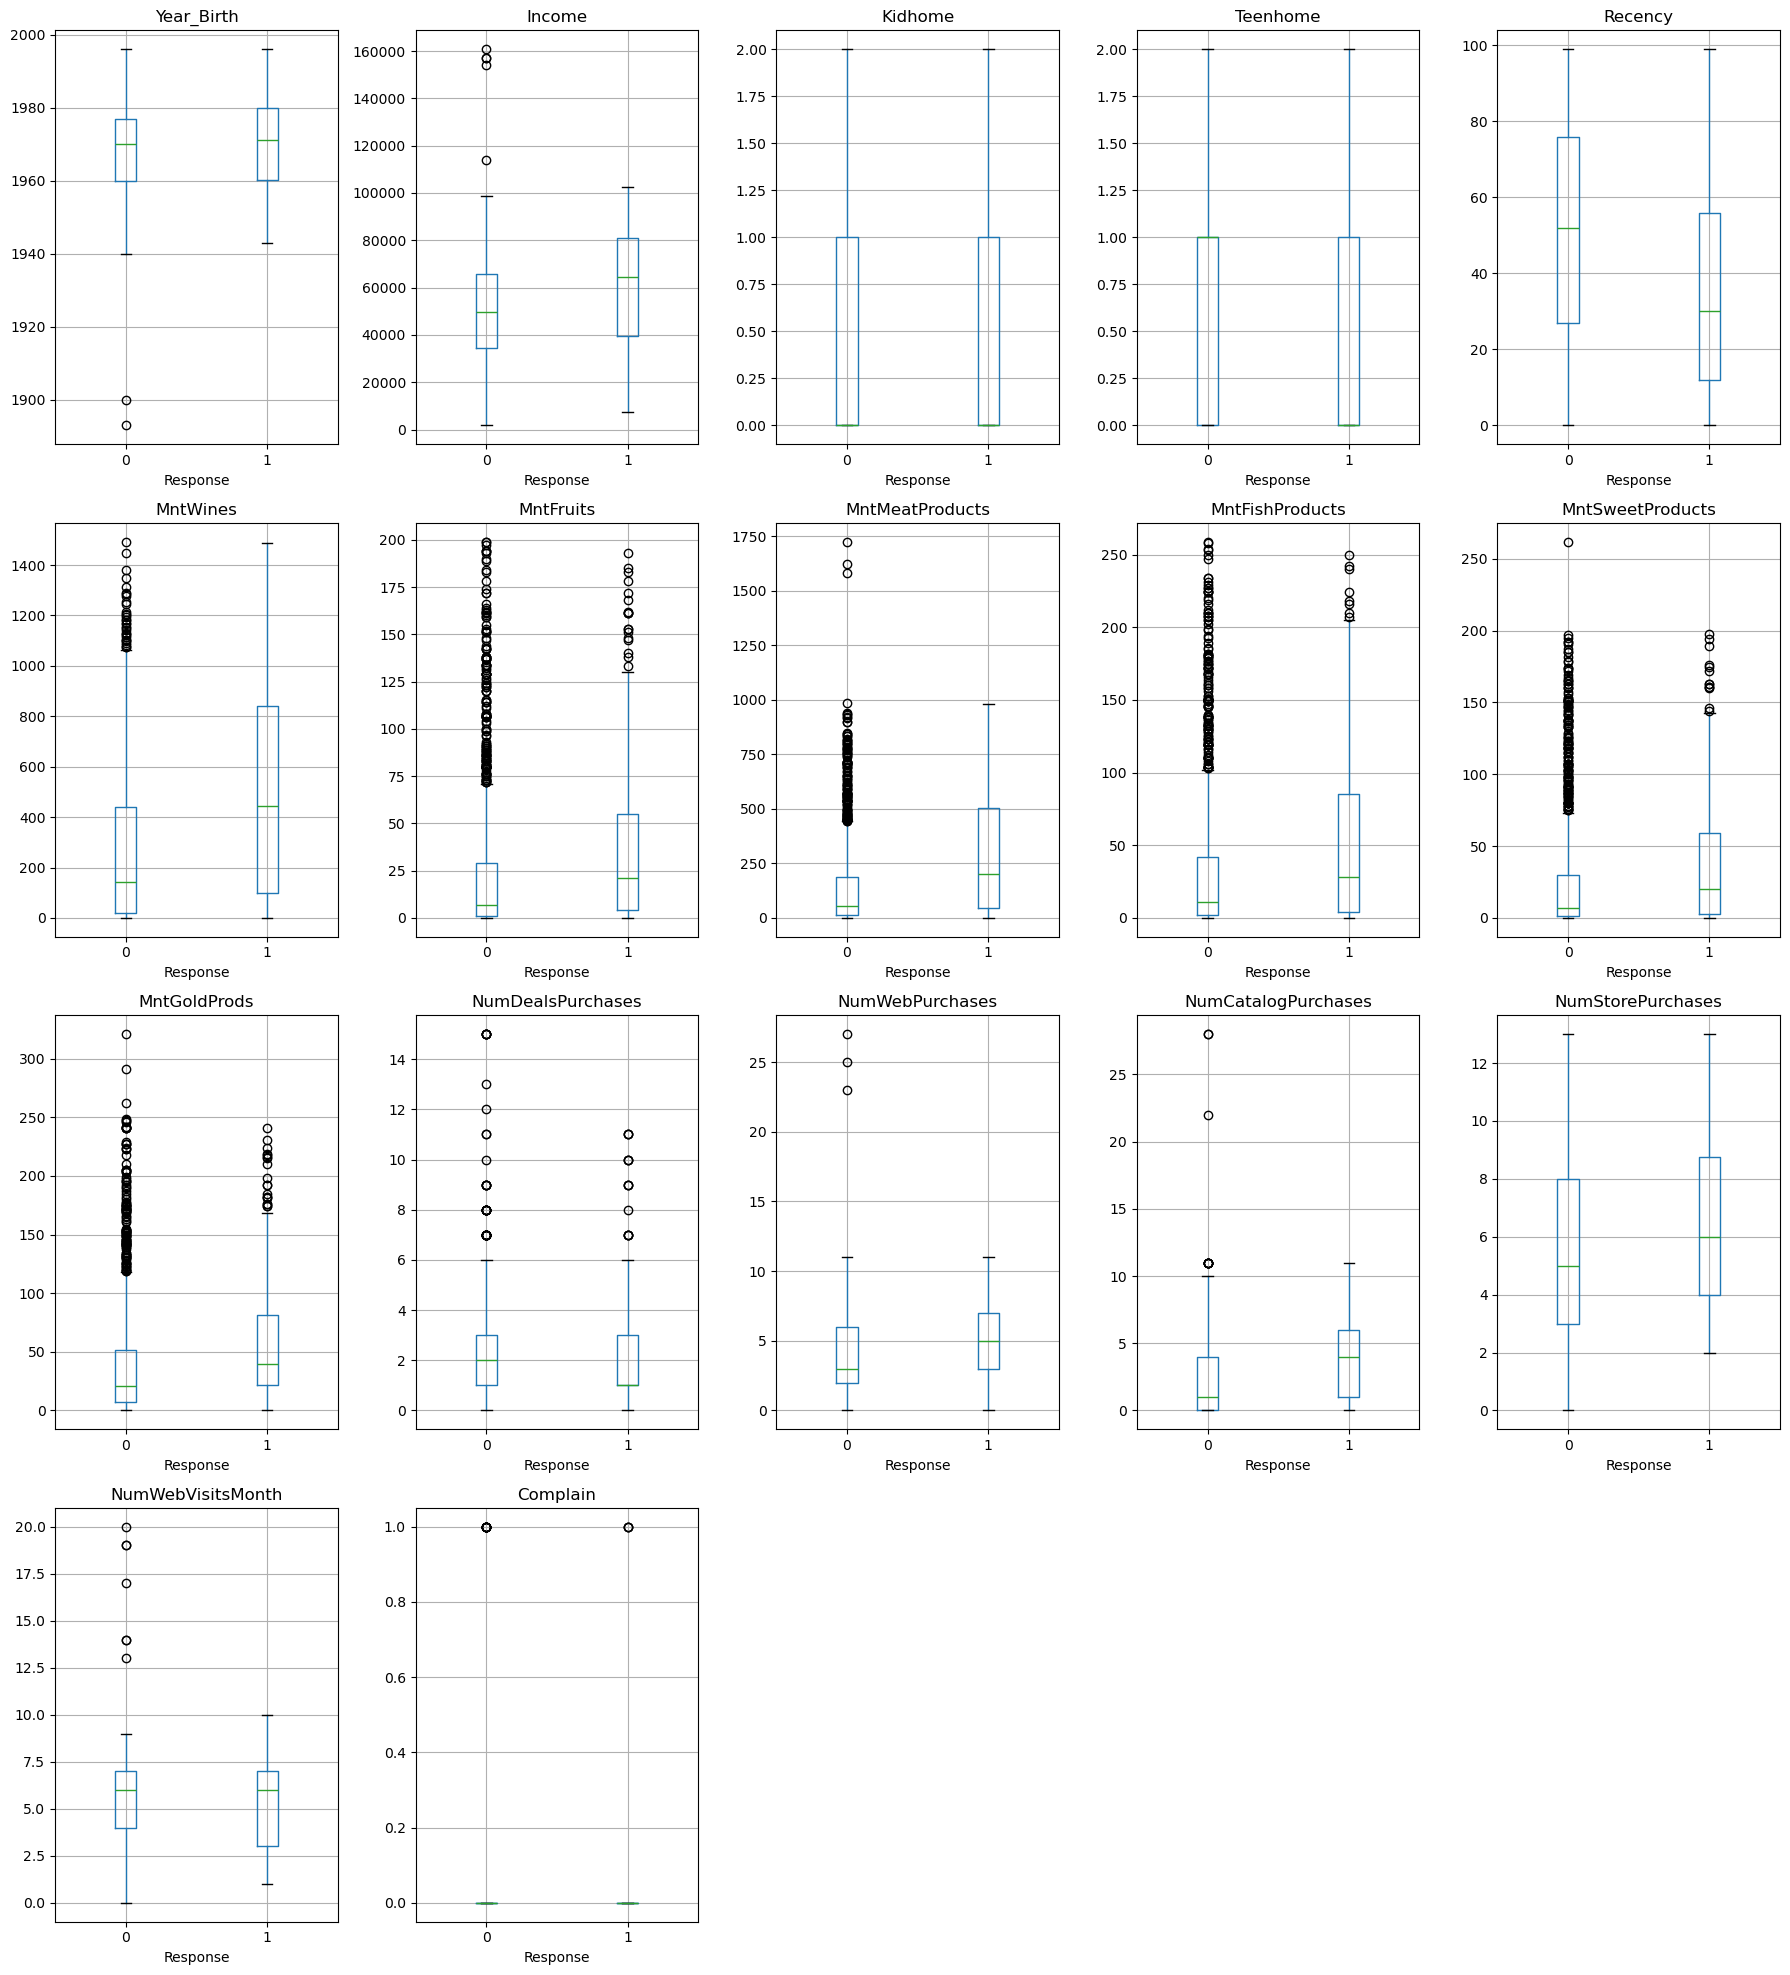

In [460]:
# Boxplots to show variable distribution
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(18, 20))

# Create boxplots for each column
data.boxplot(column='Year_Birth', by='Response', ax=axes[0, 0])
data.boxplot(column='Income', by='Response', ax=axes[0, 1])
data.boxplot(column='Kidhome', by='Response', ax=axes[0, 2])
data.boxplot(column='Teenhome', by='Response', ax=axes[0, 3])
data.boxplot(column='Recency', by='Response', ax=axes[0, 4])
data.boxplot(column='MntWines', by='Response', ax=axes[1, 0])
data.boxplot(column='MntFruits', by='Response', ax=axes[1, 1])
data.boxplot(column='MntMeatProducts', by='Response', ax=axes[1, 2])
data.boxplot(column='MntFishProducts', by='Response', ax=axes[1, 3])
data.boxplot(column='MntSweetProducts', by='Response', ax=axes[1, 4])
data.boxplot(column='MntGoldProds', by='Response', ax=axes[2, 0])
data.boxplot(column='NumDealsPurchases', by='Response', ax=axes[2, 1])
data.boxplot(column='NumWebPurchases', by='Response', ax=axes[2, 2])
data.boxplot(column='NumCatalogPurchases', by='Response', ax=axes[2, 3])
data.boxplot(column='NumStorePurchases', by='Response', ax=axes[2, 4])
data.boxplot(column='NumWebVisitsMonth', by='Response', ax=axes[3, 0])
data.boxplot(column='Complain', by='Response', ax=axes[3, 1])

# Disable unused subplots
axes[3, 2].set_axis_off()
axes[3, 3].set_axis_off()
axes[3, 4].set_axis_off()

# Set labels for all subplots
for row in axes:
    for subplot in row:
        subplot.set_xlabel('Response')

# Remove the 'by' title
plt.suptitle('')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [462]:
# Download clean data set
data.to_csv('superstore_data_clean.csv', sep=',', index=False)